In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# <font color = 'red'> ЛР 8. Кластеризация </font>

Сложность: <font color = 'Red'> Сложно  </font>.

Дата составления: 1.12.2023

Срок выполнения: 2 неделb (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Постановка задачи кластеризации </font>

Пусть задана обучающая выборка из некоторого множества объектов $X\in X_{all}$ $X = (\overline{x_1}, \overline{x_2},..., \overline{x_n}), \overline{x_i} \in \mathbb{R}^{m}$.

Задача **кластеризации** состоит в поиске обощённой функции или алгоритма $\alpha$ такой что: $\alpha:X_{all} \rightarrow Y$ или $\alpha(\overline x_{i}) = y_{i}$ для $\overline{x_i} \in X$. $Y$ - множество дискретных меток.

Алгоритмы кластеризации относят к классу *методов обучения без учителя* потому, что множество меток не известно заранее и формируется по ходу на основе обучающей выборки.

Множество $X_{cl}$ называют **кластером**, если $\forall \quad \overline{x} \in X_{cl}  \quad  \alpha(\overline{x}) = const = cl $.

## <font color = 'green'> 2. Обзор некоторых методов кластеризации  </font>

### Метод k-средних

Алгоритм **k-средних** - один из самых популярных и используемых методов кластеризации. Идея метода заключается в итеративном нахождении центров кластеров. 

Алгоритм требует изначального задания количества кластеров.

Кратко работу алгоритма можно описать так.

1. Задаём количество кластеров $k$.
2. Задаём случайные центры кластеров, которые назовём центроидами $C_{0} = (\overline{\mu_1}, \overline{\mu_2},..., \overline{\mu_k})$.
3. Кластеризуем данные из обучающей выборке, преисывая каждый сэмпл к ближ. кластеру (по некоторой метрике в $\mathbb{R}^{m}$). 
4. Далее сдвигаем положения центроидов в геометрический центр получившихся в п.3 кластеров. 
5. Проверяем условие выхода. Как правило суммарное расстояние между новыми и старыми центроидами ограничивают некторым малым значением $\epsilon$. В случае если условие выполнено, то возвращаем полученные центроиды кластеров. Если нет, возвращаемся к пункту 3.

Кластер для каждого объекта теперь определяется ближайшим к нему центроидом.

[Подробнее](https://en.wikipedia.org/wiki/K-means_clustering)

### DBSCAN

Алгоритм **DBSCAN** относится к плотностным алгоритмам кластеризации. Он предполагает специальный обход точек из обучающей выборки с последовательным их объединением в кластеры.

Общая идея работы алгоритма описывается следующим образом.

Точкой далее будем называть представителя пространства $\mathbb{R}^{m}$.
Также для работы алгоритма задают два важных гиперпараметра: точность $\epsilon$ и плотность $k$.

1. Точку $p$ будем называть **корневой** если в её $\epsilon$ - откретсности находится не менее $k$ точек.
2. Точка $q$ **прямо достижима** из $p$ если $p$-корневая точка, а расстояние $d(p,q)<\epsilon$. То есть точка $q$ в $\epsilon$ - откретсности $p$. Обозначим $p\rightarrow q$.
3. Точка $q$ **достижима** из $p$, если существует последовательность точек $p = p_{1}\rightarrow p_{2} \rightarrow p_{3}  \rightarrow ... \rightarrow p_{k} \rightarrow q $. Каждая точка $ p_{i}$ - корневая.

Кластер формирует любая корневая точка вместе со всеми точками (корневыми и нет) достижимыми из неё.

Для симметричности часто вводят понятие **плотностоной связности**. Две точки $p$ и $q$ называют *плотностно связанными*, если существует корневая точка $c$ такая что $p$ достижима из $c$ и $q$ достижима из $c$. Очивидно, что в данных терминах кластер - множество попарно *плотностно связаннымых* точек.

Реализация предполагает последовательный обход точек с формированием кластеров, согласно определениям выше. Точки, не попавшие не в один кластер (подумайте, откуда такие возьмутся?) кластризуются как шум. Алгоритм **DBSCAN** отлично показывает себя на обучающих данных различной формы.

[Подробнее](https://habr.com/ru/articles/322034/)

In [24]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles, make_swiss_roll
from matplotlib import pyplot as plt

In [198]:
import warnings
warnings.filterwarnings("ignore") 

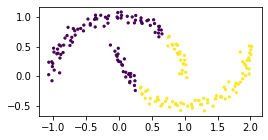

In [26]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=5, cmap='viridis');

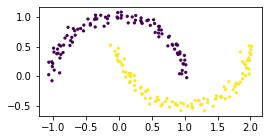

In [27]:
model = DBSCAN(eps=0.2,min_samples=5)
model.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
            s=5, cmap='viridis');

### Иерархическая агломеративная кластеризация.

Идея агломеративной кластеризации следующая.

1. Кластер формируется в каждой точке данных.
2. Далее кластеры попарно объединяются по принципу близости (к примеру минимальное расстояние между точками кластера).
3. Процесс продолжается пока данные не объединятся в один кластер.

Остановив процесс слияния на нужном этапе получим  кластеризацию на необходимое количество кластеров. 

[Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F)

## <font color = 'green'> 3. Задания </font>

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте самостоятельно, описанные алгоритмы кластеризации.
2. Сравните результаты работы со встроенными методами. Графически интерпретируйте результаты.
3. Дайте аргументированные ответы о скорости и эффективности работы на различных искусственных данных для реализованных и встроенных алгоритмов.
4. Оцените качество кластеризации используя различные методы (ARI, силуэт и др). [Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
5. Изучте ещё 3 любых метода кластеризации и приведите сравнительную характеристику работы 6 алгоритмов кластеризации по проивзодительности на различных данных.*

### KMeans

In [1]:
{i: [] for i in range(2)}

{0: [], 1: []}

In [29]:
import matplotlib.pyplot as plt

In [374]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, random_state = 10)

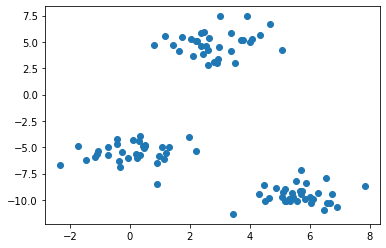

In [375]:
plt.scatter(X[:, 0], X[:, 1])

In [376]:
def myKMeans(X, k = 3, n_iter = 10, eps = 0.001):    
    rand_centrs = np.random.choice(X.shape[0], k, replace = False)
    centrs = X[rand_centrs]
    
    for i in range(n_iter):
        clusters = {i: [] for i in range(k)}
        
        for x in X:
            dist = np.linalg.norm(centrs - x, axis = 1)
            cluster_id = dist.argmin()
            clusters[cluster_id].append(x)
            
        new_centrs = {}
        for cluster in clusters:
            new_centrs[cluster] = np.mean(clusters[cluster], axis = 0)
            
        new_centrs = dict(sorted(new_centrs.items()))
        new_centrs = np.array(list(new_centrs.values()))
        
        
        flag = True        
        for cluster in range(len(centrs)):
            if np.linalg.norm(centrs[cluster] - new_centrs[cluster]) > eps:
                flag = False
                break
        if flag:
            print('Stop iteration at iter', i)
            break
        
        
        centrs = new_centrs
        
    return centrs, clusters

In [377]:
centrs, clusters = myKMeans(X)

Stop iteration at iter 4


In [378]:
centrs

array([[ 5.6183469 , -9.54288499],
       [ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422]])

In [379]:
colors = ['green', 'magenta', 'orange']

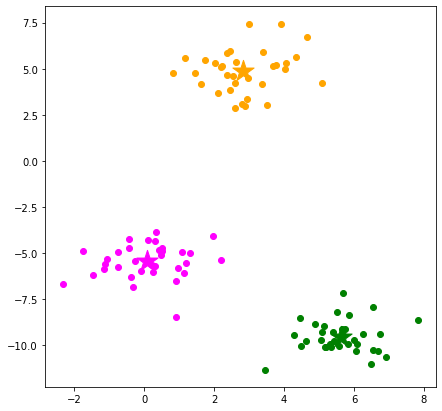

In [382]:
plt.figure(figsize = (7, 7))

for i in clusters:
    for point in clusters[i]:
        plt.scatter(point[0], point[1], color = colors[i])
        
for i, cent in enumerate(centrs):
    plt.scatter(cent[0], cent[1], marker = '*', s = 500, color = colors[i])

In [383]:
def myKMeanspp(X, k = 3):
    centrs = []
    
    rand_centr = np.random.choice(X.shape[0])
    centrs.append(X[rand_centr])
    
    #plot_data(X, np.array(centrs))
    
    for i in range(k-1):
        distance = []
        for x in X:
            dist = np.linalg.norm(centrs - x, axis = 1)
            distance.append(dist.min())
            
        next_centr = X[np.array(distance).argmax()]
        
        centrs.append(next_centr)
        #plot_data(X, np.array(centrs))
    
    return centrs

In [384]:
def plot_data(X, centrs):
    plt.figure(figsize = (4, 4))
    
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centrs[:-1, 0], centrs[:-1, 1], marker = '*', label = 'previous')
    plt.scatter(centrs[-1, 0], centrs[-1, 1], marker = '*', label = 'next', s = 300, edgecolor = 'black')
    
    plt.legend()
    plt.show()

In [385]:
myKMeanspp(X)

[array([  5.55912116, -10.06110303]),
 array([2.98771848, 7.44372871]),
 array([-1.74093095, -4.89176978])]

In [386]:
def myKMeans(X, k = 3, n_iter = 10, eps = 0.001, centrs = None): 
    if centrs == None:
        rand_centrs = np.random.choice(X.shape[0], k, replace = False)
        centrs = X[rand_centrs]
    
    for i in range(n_iter):
        clusters = {i: [] for i in range(k)}
        
        for ind, x in enumerate(X):
            dist = np.linalg.norm(centrs - x, axis = 1)
            cluster_id = dist.argmin()
            clusters[cluster_id].append(ind)
            
        new_centrs = {}
        for cluster in clusters:
            new_centrs[cluster] = np.mean(X[clusters[cluster]], axis = 0)
            
        new_centrs = dict(sorted(new_centrs.items()))
        new_centrs = np.array(list(new_centrs.values()))
        
        
        flag = True        
        for cluster in range(len(centrs)):
            if np.linalg.norm(centrs[cluster] - new_centrs[cluster]) > eps:
                flag = False
                break
        if flag:
            print('Stop iteration at iter', i)
            break
        
        
        centrs = new_centrs
        
    return centrs, clusters

In [387]:
centrs =  myKMeanspp(X)

In [388]:
centrs

[array([2.45717481, 5.96515011]),
 array([  6.47259572, -11.00351704]),
 array([-1.74093095, -4.89176978])]

In [389]:
centrs, clusters = myKMeans(X, centrs = centrs)

Stop iteration at iter 1


In [390]:
centrs

array([[ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499],
       [ 0.08921213, -5.46441742]])

In [391]:
colors = ['green', 'magenta', 'orange']

In [399]:
X[2][0]

2.443018054750785

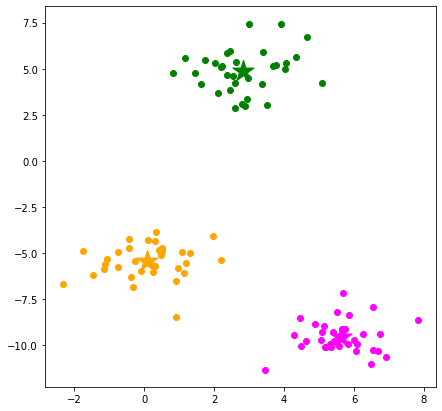

In [401]:
plt.figure(figsize = (7, 7))

for i in clusters:
    for point in clusters[i]:
        plt.scatter(X[point][0],X[point][1], color = colors[i])
        
for i, cent in enumerate(centrs):
    plt.scatter(cent[0], cent[1], marker = '*', s = 500, color = colors[i])

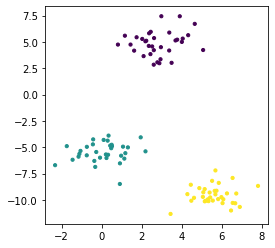

In [402]:
X, y = make_blobs(n_samples = 100, random_state = 10)

labels = KMeans(3, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=10, cmap='viridis');

In [405]:
inert = []
for i in range(1, 7):
    centrs, clusters= myKMeans(X, k = i, centrs = myKMeanspp(X, k = i))
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(X[x] - centrs[i]) ** 2
            
    inert.append(dists)

Stop iteration at iter 1
Stop iteration at iter 2
Stop iteration at iter 1
Stop iteration at iter 1
Stop iteration at iter 5
Stop iteration at iter 6


In [406]:
inert

[4372.460950204313,
 976.8773336900746,
 186.36588620101435,
 162.38376865917465,
 130.92901653602542,
 116.75596275175467]

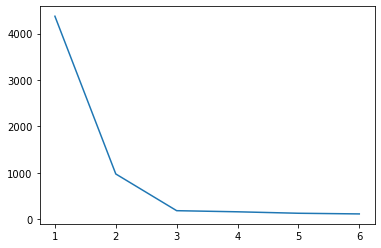

In [407]:
plt.plot(inert)
plt.xticks(np.arange(0, 6), np.arange(1, 7));

Stop iteration at iter 1


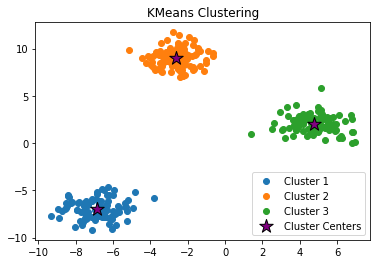

In [408]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

centrs, clusters = myKMeans(X, k=3, centrs = myKMeanspp(X, k=3))


for cluster_id, indices in clusters.items():
    cluster_points = X[indices]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}')
    
plt.scatter(centrs[:, 0], centrs[:, 1], c='purple', s=200, marker='*', edgecolor = 'black', label='Cluster Centers')

plt.title('KMeans Clustering')
plt.legend()
plt.show()


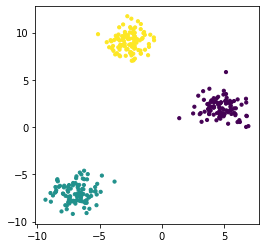

In [409]:
labels = KMeans(3, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=10, cmap='viridis');

In [410]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

predicted_labels = np.zeros(X.shape[0], dtype=int)
for cluster_id, points in clusters.items():
    predicted_labels[np.array(points)] = cluster_id

ari = adjusted_rand_score(y, predicted_labels)
print(f'Adjusted Rand Index: {ari}')

silhouette_avg = silhouette_score(X, predicted_labels)
print(f'Silhouette Score: {silhouette_avg}')


Adjusted Rand Index: 1.0
Silhouette Score: 0.8480303059596955


In [411]:
#Для встроенной

ari = adjusted_rand_score(y, labels)
print(f"ARI: {ari}")


silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")


ARI: 1.0
Silhouette Score: 0.8480303059596955


Stop iteration at iter 2
Stop iteration at iter 2
Stop iteration at iter 2
Stop iteration at iter 6
Stop iteration at iter 8


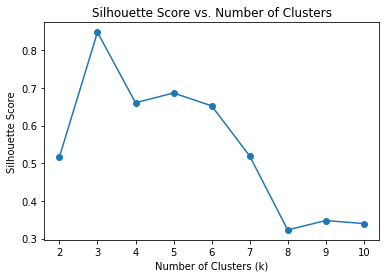

In [412]:
k_values = range(2, 11)  

silhouette_scores = []

for k in k_values:
    _, clusters = myKMeans(X, k=k)
    
    
    predicted_labels = np.zeros(X.shape[0], dtype=int)
    for cluster_id, points in clusters.items():
        predicted_labels[np.array(points)] = cluster_id
    
    silhouette_avg = silhouette_score(X, predicted_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

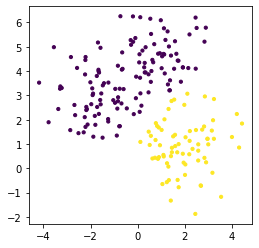

In [413]:
X, y = make_blobs(200, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=10, cmap='viridis');

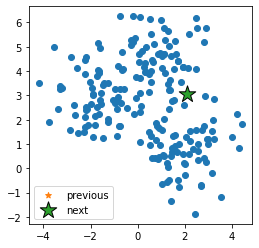

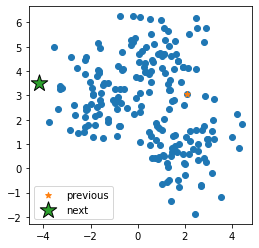

Stop iteration at iter 9


In [203]:
centrs, clusters = myKMeans(X, k = 2, eps = 0.000001, centrs = myKMeanspp(X, k = 2))

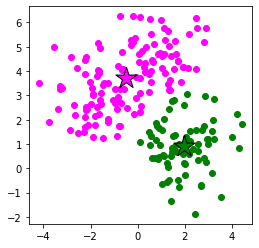

In [207]:
plt.figure(figsize = (4, 4))

for i in clusters:
    for point in clusters[i]:
        plt.scatter(point[0], point[1], color = colors[i])
        
for i, cent in enumerate(centrs):
    plt.scatter(cent[0], cent[1], marker = '*', s = 500, color = colors[i], edgecolor = 'black')

In [225]:
X, y = make_circles(n_samples = 100, random_state = 10)

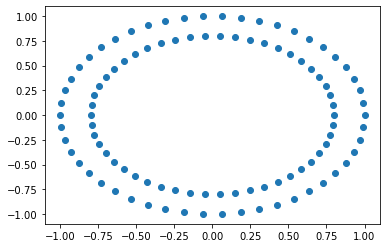

In [226]:
plt.scatter(X[:, 0], X[:, 1])

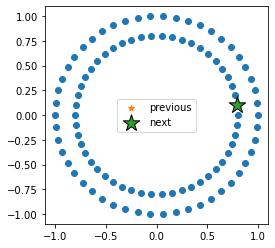

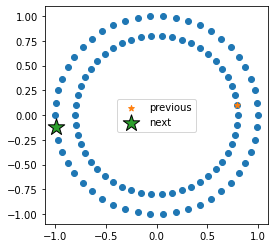

Stop iteration at iter 2


In [227]:
centrs, clusters = myKMeans(X, k = 2, eps = 0.000001, centrs = myKMeanspp(X, k = 2))

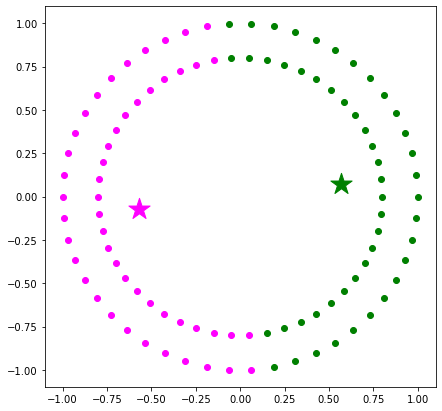

In [228]:
plt.figure(figsize = (7, 7))

for i in clusters:
    for point in clusters[i]:
        plt.scatter(point[0], point[1], color = colors[i])
        
for i, cent in enumerate(centrs):
    plt.scatter(cent[0], cent[1], marker = '*', s = 500, color = colors[i])

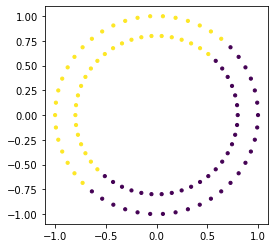

In [229]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=10, cmap='viridis');

### DBSCAN

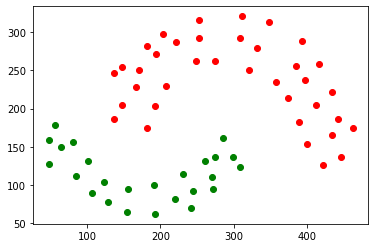

In [238]:
# Алгоритм DBSCAN, взято с сайта: https://habr.com/ru/post/322034/

from itertools import cycle
from math import hypot
from numpy import random
import matplotlib.pyplot as plt


def dbscan_naive(P, eps, m, distance):
    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
        return [q for q in P if distance(p, q) < eps]

    def expand_cluster(p, neighbours):
        if C not in clusters:
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p)
        while neighbours:
            q = neighbours.pop()
            if q not in visited_points:
                visited_points.add(q)
                neighbourz = region_query(q)
                if len(neighbourz) > m:
                    neighbours.extend(neighbourz)
            if q not in clustered_points:
                clustered_points.add(q)
                clusters[C].append(q)
                if q in clusters[NOISE]:
                    clusters[NOISE].remove(q)

    for p in P:
        if p in visited_points:
            continue
        visited_points.add(p)
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters


# P = [(98, 62), (80, 95), (71, 130), (89, 164), (137, 115), (107, 155), (109, 105), (174, 62), (183, 115), (164, 153), (142, 174), (140, 80), (308, 123), (229, 171), (195, 237), (180, 298), (179, 340), (251, 262), (300, 176), (346, 178), (311, 237), (291, 283), (254, 340), (215, 308), (239, 223), (281, 207), (283, 156)]
# P = [(126, 63), (101, 100), (80, 160), (88, 208), (89, 282), (88, 362), (94, 406), (149, 377), (147, 304), (147, 235), (146, 152), (160, 103), (174, 142), (169, 184), (170, 241), (169, 293), (185, 376), (178, 422), (116, 353), (124, 194), (273, 69), (277, 112), (260, 150), (265, 185), (270, 235), (265, 295), (281, 351), (285, 416), (321, 404), (316, 366), (306, 304), (309, 254), (309, 207), (327, 161), (318, 108), (306, 66), (425, 66), (418, 135), (411, 183), (413, 243), (414, 285), (407, 333), (411, 385), (443, 387), (455, 330), (441, 252), (457, 207), (453, 149), (455, 90), (455, 56), (439, 102), (431, 162), (431, 193), (426, 236), (427, 281), (438, 323), (419, 379), (425, 389), (422, 349), (451, 275), (441, 222), (297, 145), (284, 195), (288, 237), (292, 282), (288, 313), (303, 356), (293, 395), (274, 268), (280, 344), (303, 187), (114, 247), (131, 270), (144, 215), (124, 219), (98, 240), (96, 281), (146, 267), (136, 221), (123, 166), (101, 185), (152, 184), (104, 283), (74, 239), (107, 287), (118, 335), (89, 336), (91, 315), (151, 340), (131, 373), (108, 133), (134, 130), (94, 260), (113, 193)]
P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]

eps = 60    # размер эпсилон-окрестности
m = 5       # минимальное число объектов для полной эпсилон-окрестности

clusters = dbscan_naive(P, eps, m, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
for c, points in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), clusters.values()):
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    plt.scatter(X, Y, c=c)
plt.show()

In [414]:
def myDBSCAN(X, eps, min_samples):
    n_samples, n_features = X.shape
    labels = np.zeros(n_samples, dtype=int)
    cluster_id = 0

    def region_query(p):
        return np.where(np.linalg.norm(X - p, axis=1) < eps)[0]

    def expand_cluster(p, neighbors, cluster_id):
        labels[p] = cluster_id
        i = 0
        while i < len(neighbors):
            q = neighbors[i]
            if labels[q] == -1:
                labels[q] = cluster_id
            elif labels[q] == 0:
                labels[q] = cluster_id
                q_neighbors = region_query(X[q])
                if len(q_neighbors) >= min_samples:
                    neighbors = np.concatenate([neighbors, q_neighbors])
            i += 1

    for i in range(n_samples):
        if labels[i] != 0:
            continue

        neighbors = region_query(X[i])
        if len(neighbors) < min_samples:
            labels[i] = -1 
        else:
            cluster_id += 1
            expand_cluster(i, neighbors, cluster_id)

    return labels

In [428]:
X, y = make_blobs(n_samples=300, centers=10, random_state=42, cluster_std=0.60)
X = StandardScaler().fit_transform(X)

dbscan_sklearn = DBSCAN(eps=0.3, min_samples=5)
labels_sklearn = dbscan_sklearn.fit_predict(X)

labels_custom = myDBSCAN(X, eps=0.3, min_samples=5)

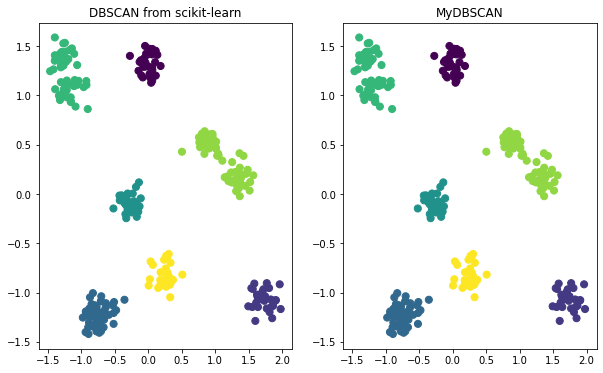

In [429]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', s=50)
plt.title('DBSCAN from scikit-learn')


plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', s=50)
plt.title('MyDBSCAN')

plt.show()

In [430]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, homogeneity_score

eps = 0.3
min_samples = 5


dbscan_sklearn = DBSCAN(eps=eps, min_samples=min_samples)
labels_sklearn = dbscan_sklearn.fit_predict(X)

labels_custom = myDBSCAN(X, eps=eps, min_samples=min_samples)

In [431]:

silhouette_custom = silhouette_score(X, labels_custom)
silhouette_sklearn = silhouette_score(X, labels_sklearn)

ari_custom = adjusted_rand_score(y, labels_custom)
ari_sklearn = adjusted_rand_score(y, labels_sklearn)

completeness_custom = completeness_score(y, labels_custom)
completeness_sklearn = completeness_score(y, labels_sklearn)

homogeneity_custom = homogeneity_score(y, labels_custom)
homogeneity_sklearn = homogeneity_score(y, labels_sklearn)


In [432]:
print(f'Silhouette Score (Custom): {silhouette_custom}')
print(f'Silhouette Score (Sklearn): {silhouette_sklearn}')
print(f'ARI (Custom): {ari_custom}')
print(f'ARI (Sklearn): {ari_sklearn}')
print(f'Completeness Score (Custom): {completeness_custom}')
print(f'Completeness Score (Sklearn): {completeness_sklearn}')
print(f'Homogeneity Score (Custom): {homogeneity_custom}')
print(f'Homogeneity Score (Sklearn): {homogeneity_sklearn}')

Silhouette Score (Custom): 0.7867302596966882
Silhouette Score (Sklearn): 0.7867302596966882
ARI (Custom): 0.7308730873087309
ARI (Sklearn): 0.7308730873087309
Completeness Score (Custom): 0.9999999999999998
Completeness Score (Sklearn): 0.9999999999999998
Homogeneity Score (Custom): 0.8193820026016112
Homogeneity Score (Sklearn): 0.8193820026016112


In [439]:
dbscan = DBSCAN(eps=0.001, min_samples=8)
labels = dbscan.fit_predict(X)
silhouette_score(X, labels_custom)

0.7867302596966882

In [275]:
X, y = make_circles(n_samples = 200, random_state = 3)

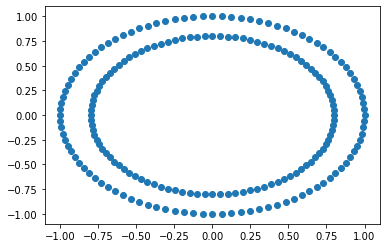

In [276]:
plt.scatter(X[:, 0], X[:, 1])

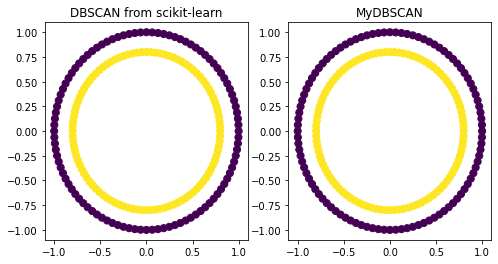

In [280]:
dbscan_sklearn = DBSCAN(eps=0.1, min_samples=2)
labels_sklearn = dbscan_sklearn.fit_predict(X)

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', s=50)
plt.title('DBSCAN from scikit-learn')


labels_custom = myDBSCAN(X, eps=0.1, min_samples=2)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', s=50)
plt.title('MyDBSCAN')

plt.show()

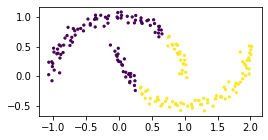

In [281]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=5, cmap='viridis');

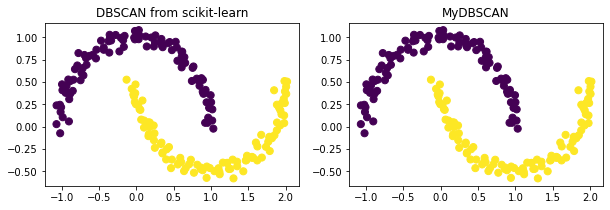

In [291]:
dbscan_sklearn = DBSCAN(eps=0.2, min_samples=5)
labels_sklearn = dbscan_sklearn.fit_predict(X)

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', s=50)
plt.title('DBSCAN from scikit-learn')


labels_custom = myDBSCAN(X, eps=0.2, min_samples=5)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', s=50)
plt.title('MyDBSCAN')

plt.show()

### Иерархическая агломеративная кластеризация.

In [587]:
X, y = make_blobs(n_samples=300, centers=10, random_state=42, cluster_std=0.60)

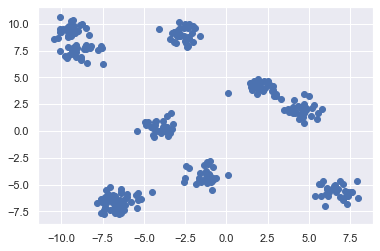

In [540]:
plt.scatter(X[:, 0], X[:, 1])

In [536]:
import scipy.cluster.hierarchy as sch

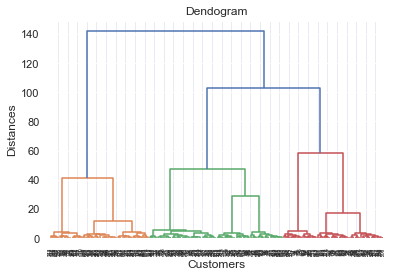

In [538]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

In [546]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [547]:
y_hc

array([5, 3, 4, 6, 1, 0, 3, 0, 4, 6, 4, 0, 6, 4, 5, 1, 0, 3, 5, 1, 5, 4,
       5, 1, 2, 3, 3, 0, 0, 4, 6, 1, 4, 5, 3, 0, 4, 0, 4, 0, 4, 4, 6, 4,
       0, 1, 6, 0, 3, 4, 0, 2, 3, 0, 1, 0, 2, 2, 3, 1, 1, 1, 6, 4, 0, 0,
       1, 3, 2, 2, 5, 3, 4, 6, 2, 6, 3, 4, 1, 4, 2, 4, 2, 2, 0, 6, 4, 4,
       5, 2, 5, 0, 3, 5, 3, 0, 1, 4, 4, 2, 6, 0, 0, 0, 1, 0, 1, 4, 4, 2,
       0, 3, 1, 0, 1, 0, 5, 5, 6, 1, 5, 6, 4, 2, 6, 1, 4, 0, 5, 5, 4, 4,
       6, 0, 1, 6, 5, 1, 6, 1, 0, 2, 0, 5, 5, 0, 1, 0, 5, 6, 0, 3, 5, 4,
       4, 0, 1, 0, 1, 0, 4, 1, 6, 2, 4, 5, 6, 0, 1, 4, 0, 1, 3, 4, 4, 1,
       0, 3, 6, 2, 1, 2, 3, 0, 4, 4, 0, 4, 3, 1, 0, 1, 3, 3, 4, 0, 1, 2,
       5, 4, 0, 1, 2, 1, 5, 0, 0, 6, 4, 1, 6, 1, 3, 1, 1, 4, 4, 5, 5, 1,
       0, 5, 4, 1, 4, 2, 1, 0, 4, 4, 3, 0, 2, 4, 4, 0, 4, 2, 4, 6, 2, 3,
       6, 4, 4, 1, 0, 6, 1, 4, 4, 3, 0, 4, 1, 1, 2, 0, 2, 1, 1, 3, 1, 2,
       1, 2, 1, 6, 0, 5, 3, 4, 4, 5, 6, 4, 1, 1, 3, 0, 0, 0, 5, 3, 1, 1,
       6, 6, 4, 5, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1], d

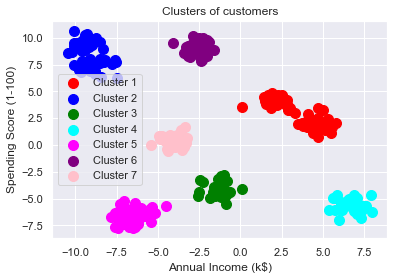

In [549]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

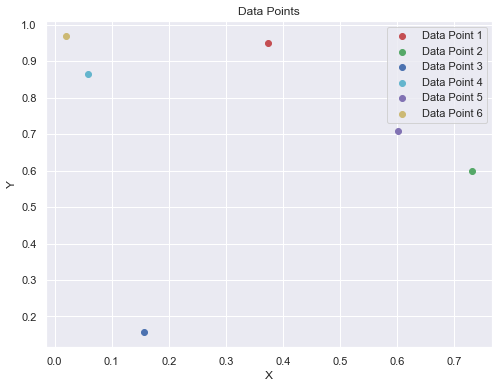

In [561]:
np.random.seed(42)
data_points = np.random.rand(6, 2)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
plt.figure(figsize=(8, 6))
for i in range(len(data_points)):
    plt.scatter(data_points[i, 0], data_points[i, 1], color=colors[i], label=f'Data Point {i+1}')
plt.legend()
plt.title('Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

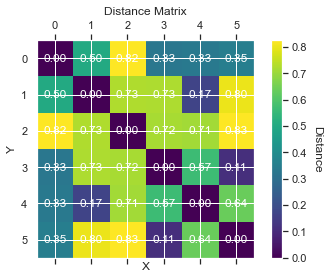

In [562]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
# Calculate distance matrix
distance_matrix = squareform(pdist(data_points))

# Visualization distance matrix
fig, ax = plt.subplots()
cax = ax.matshow(distance_matrix, cmap='viridis')

# Distance values for matrix cells
for i in range(len(data_points)):
    for j in range(len(data_points)):
        ax.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Add color bar
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Distance', rotation=270, labelpad=15)

# Show chart
plt.title('Distance Matrix')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [566]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_example)

In [567]:
y_hc

array([1, 0, 1, 0, 1, 2], dtype=int64)

In [569]:
data_example

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

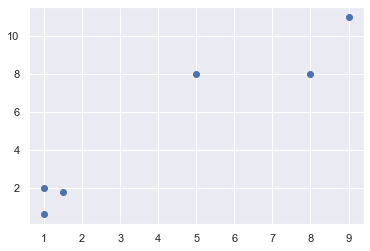

In [568]:
plt.scatter(data_example[:, 0], data_example[:, 1])

In [573]:
float('inf')

inf

In [585]:
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<font color = 'red' size = 5>Задание 2 </font>

1. Примените изученные методы кластеризации для указанных ниже данных.
2. Приведите различные оценки качества для моделей.
3. Предложите методики для определения оптимальных гиперпараметров моделей.
4. Дайте аргументированные ответы о применимости того или иного алгоритма на различных данных.

[Датасет 1](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

[Датасет 2](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering/code)

[Датасет 3](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [628]:
wine = pd.read_csv('wine-clustering.csv')

In [629]:
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [630]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [631]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

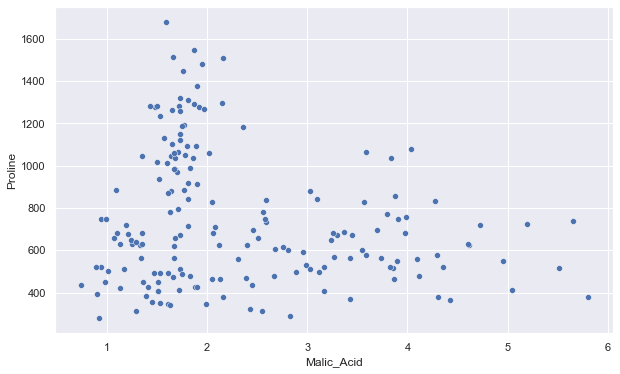

In [632]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))  

sns.scatterplot(data=wine,x="Malic_Acid",y="Proline");

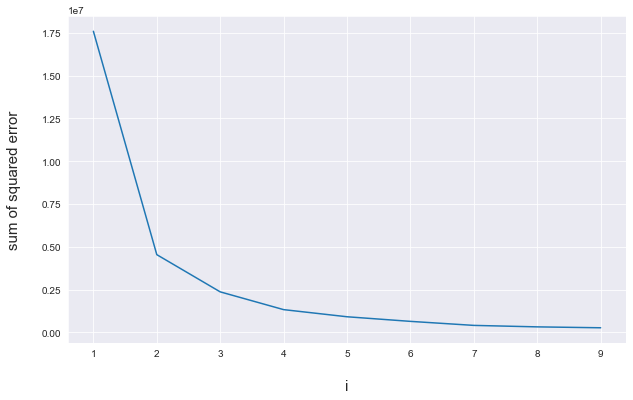

In [453]:
v=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit_predict(wine)
    v.append(model.inertia_)

plt.figure(figsize=(10,6))     
plt.xlabel("\ni",fontsize=15)
plt.ylabel("sum of squared error\n",fontsize=15)
plt.plot(range(1,10),v);

In [491]:
model=KMeans(n_clusters=2)
pred=model.fit_predict(wine)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

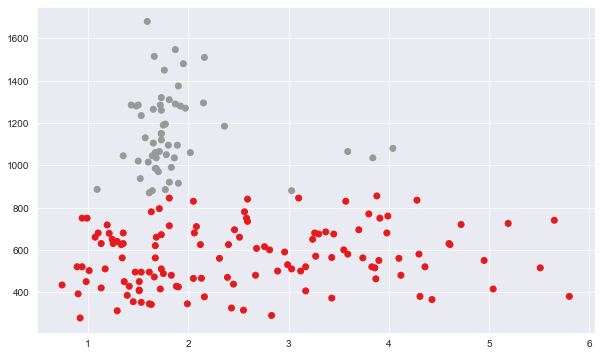

In [459]:
plt.figure(figsize=(10, 6))
plt.scatter(wine.Malic_Acid, wine.Proline, c=pred, cmap='Set1');

In [460]:
silhouette_score(wine, labels=model.labels_, metric='euclidean')

0.6568536504294317

In [624]:
model=DBSCAN(eps = 7, min_samples = 3)
pred=model.fit_predict(wine)
pred

array([-1,  0, -1, -1, -1, -1,  1, -1,  0,  0, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2, -1, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,
       -1,  5, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  6,  4,  5, -1, -1,
       -1, -1, -1, -1,  6,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  3,  2, -1,  2, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

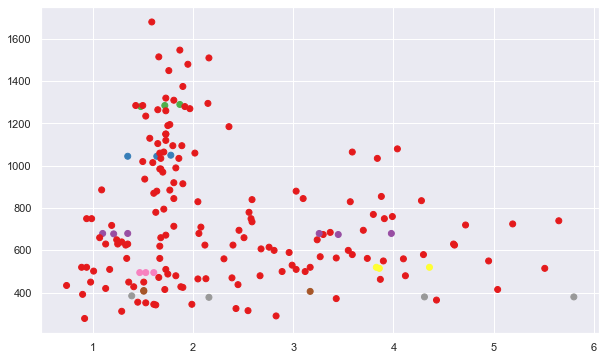

In [625]:
plt.figure(figsize=(10, 6))
plt.scatter(wine.Malic_Acid, wine.Proline, c=pred, cmap='Set1');

In [627]:
model=DBSCAN(eps = 5, min_samples = 5)
pred=model.fit_predict(wine)
pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

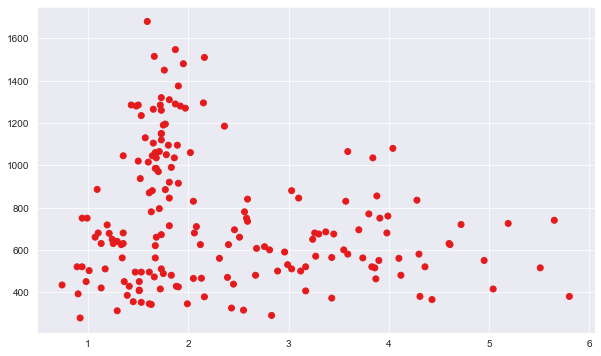

In [482]:
plt.figure(figsize=(10, 6))
plt.scatter(wine.Malic_Acid, wine.Proline, c=pred, cmap='Set1');

### 2

In [486]:
cust = pd.read_csv('segmentation data.csv')

In [487]:
cust

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


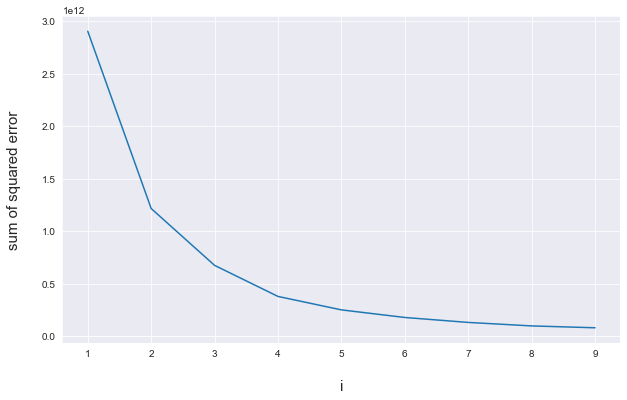

In [488]:
v=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit_predict(cust)
    v.append(model.inertia_)

plt.figure(figsize=(10,6))     
plt.xlabel("\ni",fontsize=15)
plt.ylabel("sum of squared error\n",fontsize=15)
plt.plot(range(1,10),v);

In [509]:
model=KMeans(n_clusters=4)
Y=model.fit_predict(cust)
Y

array([3, 0, 1, ..., 1, 3, 1])

In [510]:
silhouette_score(cust, labels=model.labels_, metric='euclidean')

0.5411197716869013

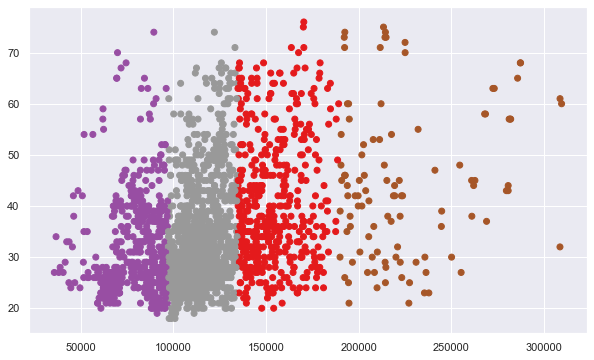

In [513]:
plt.figure(figsize=(10, 6))
plt.scatter( cust.Income, cust.Age, c=Y, cmap='Set1');

In [460]:
silhouette_score(wine, labels=model.labels_, metric='euclidean')

0.6568536504294317

## 3

In [514]:
house = pd.read_csv('housing.csv')

In [515]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


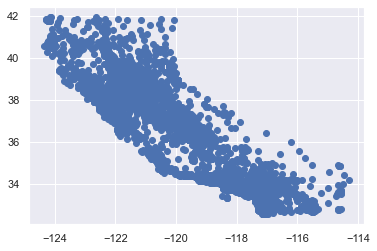

In [516]:
plt.scatter(house['longitude'],house['latitude'])

In [526]:
x_train_lat_long=house[['longitude','latitude']].to_numpy()
kmeans=KMeans(n_clusters=7).fit(x_train_lat_long)
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 5])

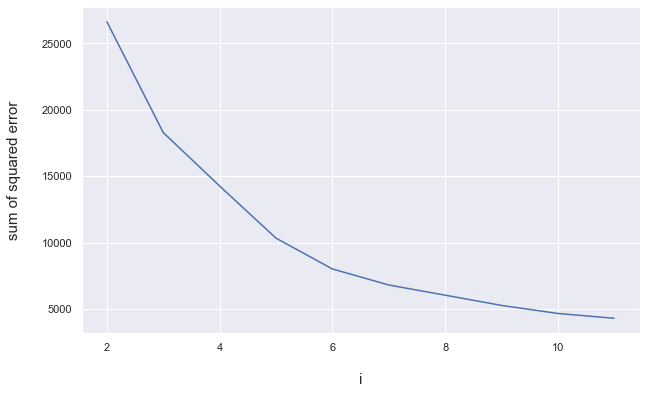

In [644]:
v=[]
for i in range(2,12):
    model=KMeans(n_clusters=i)
    model.fit_predict(x_train_lat_long)
    v.append(model.inertia_)

plt.figure(figsize=(10,6))     
plt.xlabel("\ni",fontsize=15)
plt.ylabel("sum of squared error\n",fontsize=15)
plt.plot(range(2,12),v);

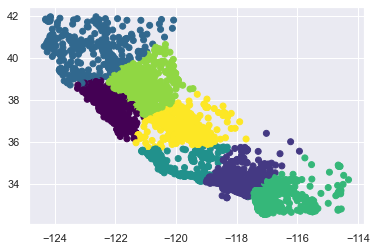

In [527]:

plt.scatter(house['longitude'], house['latitude'],c=kmeans.labels_, cmap = 'viridis')

In [638]:
x_train_lat_long=house[['longitude','latitude']].to_numpy()
model=DBSCAN(eps = 15, min_samples = 2).fit(x_train_lat_long)
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

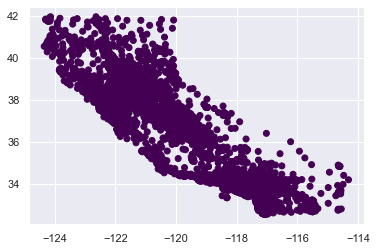

In [639]:
plt.scatter(house['longitude'], house['latitude'],c=model.labels_, cmap = 'viridis')

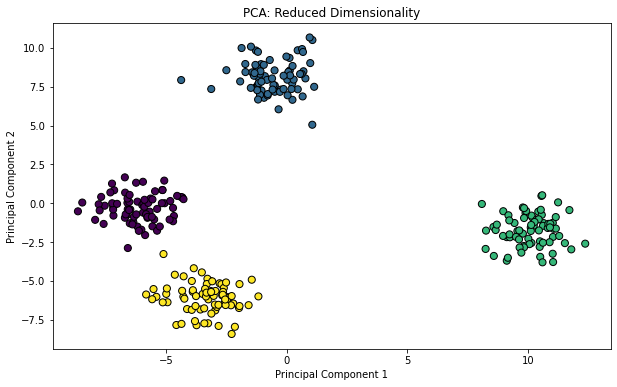

Explained Variance Ratio: 100.00%


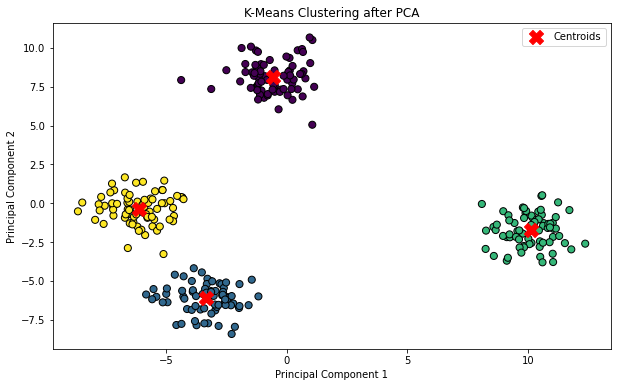

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Генерация случайного набора данных
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Понижение размерности с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация данных после понижения размерности
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA: Reduced Dimensionality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Вывод процента объясненной дисперсии
explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {explained_variance_ratio * 100:.2f}%')

# Кластеризация с использованием K-средних на данных после PCA
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


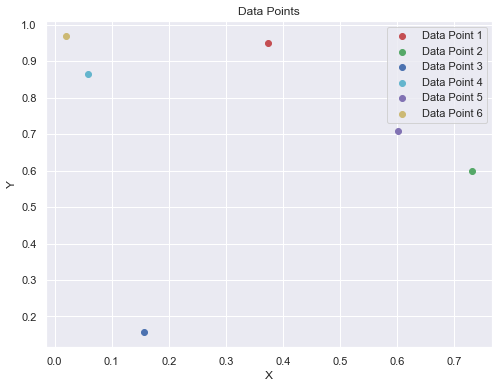

In [561]:
np.random.seed(42)
data_points = np.random.rand(6, 2)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
plt.figure(figsize=(8, 6))
for i in range(len(data_points)):
    plt.scatter(data_points[i, 0], data_points[i, 1], color=colors[i], label=f'Data Point {i+1}')
plt.legend()
plt.title('Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

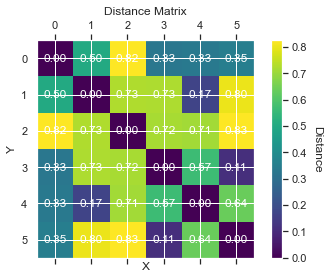

In [562]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
# Calculate distance matrix
distance_matrix = squareform(pdist(data_points))

# Visualization distance matrix
fig, ax = plt.subplots()
cax = ax.matshow(distance_matrix, cmap='viridis')

# Distance values for matrix cells
for i in range(len(data_points)):
    for j in range(len(data_points)):
        ax.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Add color bar
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Distance', rotation=270, labelpad=15)

# Show chart
plt.title('Distance Matrix')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [566]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_example)

In [567]:
y_hc

array([1, 0, 1, 0, 1, 2], dtype=int64)

In [569]:
data_example

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

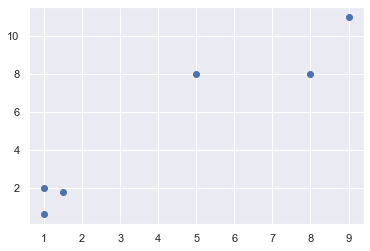

In [568]:
plt.scatter(data_example[:, 0], data_example[:, 1])

In [573]:
float('inf')

inf

In [600]:
import math

class MAgglomerativeClustering:
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def fit_predict(self, X):
        clusters = {i: [list(X[i])] for i in range(len(X))}
        while len([v for v in clusters.values() if v != 0]) > self.n_clusters:
            indexes = dict()           
            for i in clusters.keys():   
                if clusters[i] == 0:
                    continue
                dist = dict()
                for j in clusters.keys():
                    if i != j and clusters[j] != 0:
                        dist[j] = math.dist(np.mean(clusters[i], axis=0), np.mean(clusters[j], axis=0)) # центроидный метод
                min_index = min(dist, key=dist.get)
                indexes[i] = (dist[min_index], min_index)
            
            near = {k: v for k, v in sorted(indexes.items(), key=lambda x: x[1][0])}
            
            for k, v in near.items():
                if len([k for k, v in near.items() if v != 0]) == self.n_clusters:
                    break
                if v == 0 or clusters[v[1]] == 0:
                    continue
                else:
                    clusters[k].extend(clusters[v[1]])
                    clusters[v[1]] = 0 # использованный кластер
                    near[v[1]] = 0  # использованный кластер
        
        self.clusters = {i: v for i, v in enumerate({i: v for i, v in clusters.items() if v != 0}.values())}
        return self.clusters

In [601]:
agl = MAgglomerativeClustering(n_clusters=7)

In [605]:
y = agl.fit_predict(X)

In [618]:
np.array(y[0])[:, 0]

array([-2.78558089, -2.5524037 , -2.91535082, -2.87022159, -2.29236026,
       -2.53069325, -2.31043956, -1.89059791, -2.02168213, -3.39631082,
       -3.17299861, -3.05401207, -3.01272814, -2.83582726, -2.79670217,
       -2.86958084, -4.08104469, -3.30610925, -3.19979377, -3.1168963 ,
       -1.62980836, -2.06611768, -2.29221601, -2.31474724, -2.57858659,
       -2.01567068, -2.4686807 , -2.51729596, -2.38387947, -2.30302665])

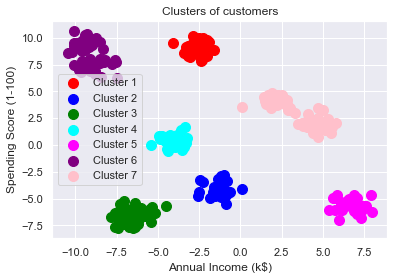

In [620]:
plt.scatter(np.array(y[0])[:, 0], np.array(y[0])[:, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(np.array(y[1])[:, 0], np.array(y[1])[:, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(np.array(y[2])[:, 0], np.array(y[2])[:, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(np.array(y[3])[:, 0], np.array(y[3])[:, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(np.array(y[4])[:, 0], np.array(y[4])[:, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(np.array(y[5])[:, 0], np.array(y[5])[:, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(np.array(y[6])[:, 0], np.array(y[6])[:, 1], s = 100, c = 'pink', label = 'Cluster 7')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()